In [1]:
import pandas as pd
import seaborn as sns

## Explore the data

Suppose we want to predict `acceleration` given the other numerical characteristics of a car

In [2]:
df = pd.read_csv("../datasets/auto-mpg.csv")

In [3]:
df.shape

(398, 9)

In [4]:
df = df.drop("car name", axis=1)

In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [6]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

Horsepower seems not to be a numeric column. What is going on?

In [7]:
for hp in df.horsepower:
    try:
        int(hp)
    except:
        print(hp)

?
?
?
?
?
?


In [8]:
# drop ? horsepowers
df = df[df.horsepower != "?"]

In [9]:
df.shape

(392, 8)

In [10]:
df.horsepower = df.horsepower.astype(float)

In [11]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [12]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


## Build model with whole dataset

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lr = LinearRegression()

In [15]:
X = df.drop("acceleration", axis=1)
y = df.acceleration

In [16]:
X[:5]

,mpg,cylinders,displacement,horsepower,weight,model year,origin
0,18.0,8,307.0,130.0,3504,70,1
1,15.0,8,350.0,165.0,3693,70,1
2,18.0,8,318.0,150.0,3436,70,1
3,16.0,8,304.0,150.0,3433,70,1
4,17.0,8,302.0,140.0,3449,70,1


In [17]:
y[:5]

0    12.0
1    11.5
2    11.0
3    12.0
4    10.5
Name: acceleration, dtype: float64

In [18]:
lr.fit(X=X, y=y)

LinearRegression()

In [19]:
y[:1]

0    12.0
Name: acceleration, dtype: float64

In [20]:
lr.predict(X[:1])

array([14.00670318])

In [21]:
lr.predict(X[:5])

array([14.00670318, 11.21709765, 11.9784462 , 12.04025895, 12.98764533])

In [22]:
# r2 is the default score for LinearRegression
lr.score(X, y)

0.619822478208412

In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
mean_squared_error(y_true=y, y_pred=lr.predict(X))

2.8862752656774058

## Train-test split procedure

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
df.shape

(392, 8)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

In [28]:
X_train.shape

(313, 7)

In [29]:
X_test.shape

(79, 7)

In [30]:
lr2 = LinearRegression()

In [31]:
lr2.fit(X_train, y_train)

LinearRegression()

In [32]:
lr2.score(X_train, y_train)

0.6487240926173845

<AxesSubplot:xlabel='acceleration'>

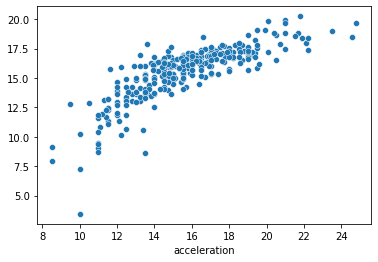

In [33]:
sns.scatterplot(x=y_train, y=lr2.predict(X_train))

In [34]:
X_test.shape

(79, 7)

In [35]:
lr2.predict(X_test)

array([17.16153579, 18.32664526, 16.52300958, 16.38317796, 15.26775379,
       15.15423995, 14.33551024, 18.10607805, 14.08265941, 17.03851659,
       17.6366213 , 13.46449532, 12.54666385, 15.01013016, 16.57427772,
       14.11055155, 16.84212527, 18.51070931, 14.70274312, 16.94330499,
       15.94950213, 17.05394097, 16.58711223, 18.16909028, 16.37258358,
       17.63134146, 17.31069439,  9.59162354, 16.43804485, 15.8105619 ,
       13.24896061, 11.99870958, 11.16296394, 14.61903629,  8.79975837,
       15.45683198, 15.73791823, 17.48240154, 16.47161955, 17.00826609,
       13.68743823, 16.58612465, 15.82021604, 15.35524863, 15.60641987,
       16.86141032, 16.39097635, 16.81150391, 17.08813361, 11.30405591,
       16.54647276, 14.95349874, 14.02726134, 19.51504164, 16.77785509,
       16.70155966, 17.61777439,  9.71136491, 17.38467945, 14.74260273,
        6.24292631, 17.51416174, 16.00891927, 14.39996568, 16.66840996,
        7.57336141, 16.6376644 , 17.29807236, 15.7761267 , 17.06

In [36]:
y_test[:5]

396    18.6
117    19.5
191    15.4
371    16.0
274    15.9
Name: acceleration, dtype: float64

In [37]:
lr2.score(X_test, y_test)

0.43439098354132977

This is the expected error we will have when testing on OTHER UNSEEN cars

<AxesSubplot:xlabel='acceleration'>

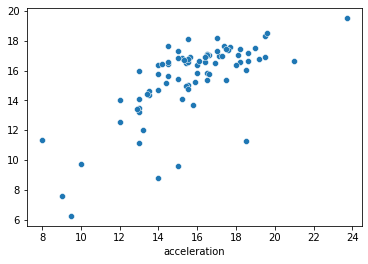

In [38]:
sns.scatterplot(x=y_test, y=lr2.predict(X_test))